# Name: Nisrin Dhoondia

## Email: nisrin.dhoondia@gmail.com  


# Global AI Hub

## Project  

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be Churn column.  

## Steps  

* Read the churn.csv file and describe it.  
* Make at least 4 different analysis on Exploratory Data Analysis section.  
* Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)  
* Define appropriate evaluation metric for our case (classification).  
* Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.  
* Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.  
* Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.  
* Analyse and compare results of 3 algorithms.  
* Select best performing model based on evaluation metric you chose on test dataset.


In [ ]:
#importing libraries 
import numpy as np
import pandas as pd

#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/KutayAkalin/ML_Course_30-11-20/main/Project/churn.csv')

In [ ]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has 
#and memory usage.
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
#getting the columns name
churn_data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [ ]:
#renaming the columns as per Python convention
churn_data.rename(columns={'Churn' : 'churn', 'AccountWeeks' : 'account_weeks', 'ContractRenewal' : 'contract_renewal', 'DataPlan' : 'data_plan', 
                           'DataUsage' : 'data_usage', 'CustServCalls' : 'cust_servcalls', 'DayMins' : 'day_mins', 'DayCalls' : 'day_calls', 
                           'MonthlyCharge' : 'monthly_charge', 'OverageFee' : 'overage_fee', 'RoamMins' : 'roam_mins'}, inplace = True)

In [ ]:
#rechecking the columns name
churn_data.columns

Index(['churn', 'account_weeks', 'contract_renewal', 'data_plan', 'data_usage',
       'cust_servcalls', 'day_mins', 'day_calls', 'monthly_charge',
       'overage_fee', 'roam_mins'],
      dtype='object')

In [ ]:
#just extra checking for null values
churn_data.isnull().sum()

churn               0
account_weeks       0
contract_renewal    0
data_plan           0
data_usage          0
cust_servcalls      0
day_mins            0
day_calls           0
monthly_charge      0
overage_fee         0
roam_mins           0
dtype: int64

In [ ]:
#first 5 rows content of the dataset
churn_data.head()

,churn,account_weeks,contract_renewal,data_plan,data_usage,cust_servcalls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
#last 5 rows content of the dataset
churn_data.tail()

,churn,account_weeks,contract_renewal,data_plan,data_usage,cust_servcalls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [ ]:
#checking for duplicates values
churn_data.duplicated().sum()

0

In [ ]:
#viewing some basic statistical details
churn_data.describe()

,churn,account_weeks,contract_renewal,data_plan,data_usage,cust_servcalls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [ ]:
#target column (dependent variable) all unique values count. It is a Binary Classification
churn_data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [ ]:
#find the percentage of all the unique values in the target column (dependent variable) 
round(churn_data['churn'].value_counts(normalize = True)* 100, 2)

0    85.51
1    14.49
Name: churn, dtype: float64

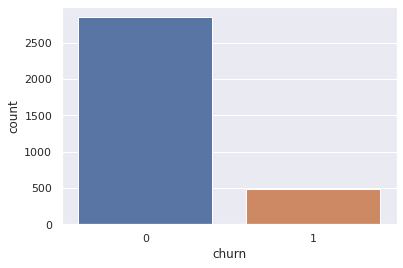

In [ ]:
#visual representation of the target column (dependent variable) all unique values count
sns.set(style="darkgrid")
ax = sns.countplot(x='churn',  data=churn_data)
plt.show()

**churn_data dataset is an imbalance dataset. We will handle this later on the training set**


In [ ]:
colname = list(churn_data.columns)
colname.remove('churn') #removing the dependent varible
colname

['account_weeks',
 'contract_renewal',
 'data_plan',
 'data_usage',
 'cust_servcalls',
 'day_mins',
 'day_calls',
 'monthly_charge',
 'overage_fee',
 'roam_mins']

In [ ]:
#finding the mean relationship of independent variables with the dependent variable
churn_data.groupby('churn').mean()

,account_weeks,contract_renewal,data_plan,data_usage,cust_servcalls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins
churn,,,,,,,,,,
0,100.793684,0.934737,0.295439,0.862151,1.449825,175.175754,100.283158,55.816246,9.954618,10.158877
1,102.664596,0.716356,0.165631,0.546957,2.229814,206.914079,101.335404,59.190062,10.623085,10.700000


In [ ]:
# Creating the same table as above but now the pivot table of median of each columns
churn_data.pivot_table(colname, ['churn'], aggfunc=np.median) #mean is default

,account_weeks,contract_renewal,cust_servcalls,data_plan,data_usage,day_calls,day_mins,monthly_charge,overage_fee,roam_mins
churn,,,,,,,,,,
0,100,1,1,0,0.0,100,177.2,53.0,9.98,10.2
1,103,1,2,0,0.0,103,217.6,63.0,10.57,10.6


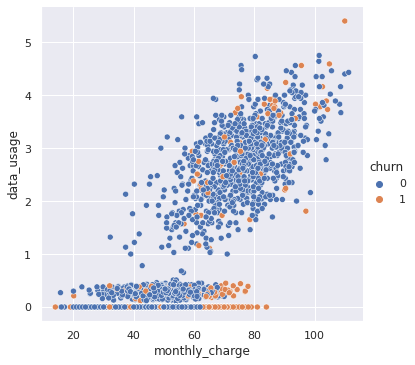

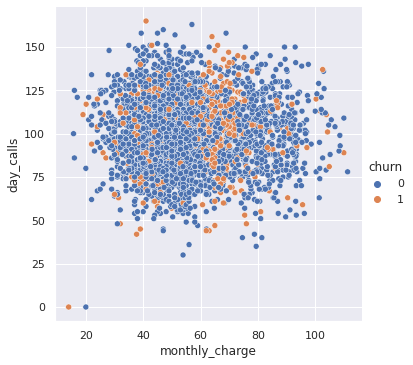

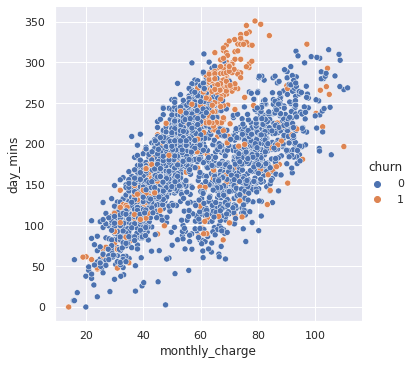

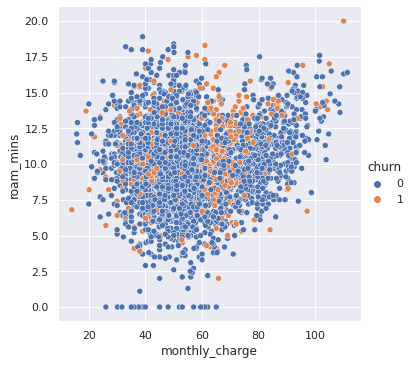

In [ ]:
sns.relplot(x='monthly_charge', y='data_usage', hue='churn', data=churn_data)
sns.relplot(x='monthly_charge', y='day_calls', hue='churn', data=churn_data)
sns.relplot(x='monthly_charge', y='day_mins', hue='churn', data=churn_data)
sns.relplot(x='monthly_charge', y='roam_mins', hue='churn', data=churn_data);

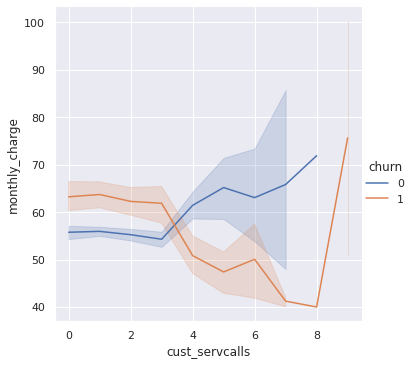

In [ ]:
sns.relplot(x='cust_servcalls', y='monthly_charge', hue='churn', kind="line", data=churn_data);

**Seems like there is a need to focus to quality customer calls rather than quantity** 

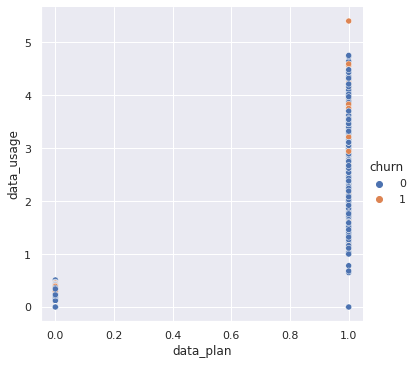

In [ ]:
sns.relplot(x='data_plan', y='data_usage', hue='churn',  data=churn_data);

In [ ]:
churn_data.corr()

,churn,account_weeks,contract_renewal,data_plan,data_usage,cust_servcalls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins
churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
account_weeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
contract_renewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
data_plan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
data_usage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
cust_servcalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
day_mins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
day_calls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
monthly_charge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
overage_fee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


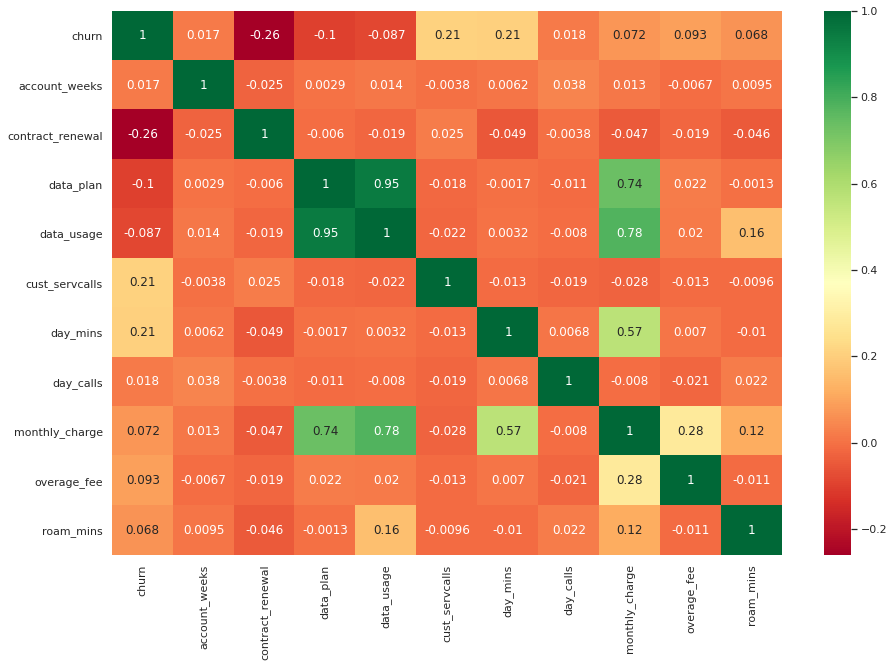

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(churn_data.corr(), cmap='RdYlGn', annot=True);

In [ ]:
#scaling each feature individually to a given range between zero and one because some are weeks, some are minutes and some are quantity.
from sklearn.preprocessing import MinMaxScaler
minmax_churndata = churn_data.drop('churn', axis = 1)

minmax_scaler = MinMaxScaler()
minmax_churndata = minmax_scaler.fit_transform(minmax_churndata)
minmax_churndata = pd.DataFrame(minmax_churndata, columns = colname)
minmax_churndata['churn'] = churn_data['churn']
minmax_churndata.head()

,account_weeks,contract_renewal,data_plan,data_usage,cust_servcalls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins,churn
0,0.524793,1.0,1.0,0.500000,0.111111,0.755701,0.666667,0.770812,0.542606,0.500,0
1,0.438017,1.0,1.0,0.685185,0.111111,0.460661,0.745455,0.698869,0.537658,0.685,0
2,0.561983,1.0,0.0,0.000000,0.000000,0.693843,0.690909,0.390545,0.333150,0.610,0
3,0.342975,0.0,0.0,0.000000,0.222222,0.853478,0.430303,0.441932,0.170423,0.330,0
4,0.305785,0.0,0.0,0.000000,0.333333,0.475200,0.684848,0.277492,0.407916,0.505,0


In [ ]:
minmax_churndata.describe()

,account_weeks,contract_renewal,data_plan,data_usage,cust_servcalls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.413491,0.903090,0.276628,0.151199,0.173651,0.512472,0.608701,0.434791,0.552583,0.511865,0.144914
std,0.164554,0.295879,0.447398,0.235679,0.146166,0.155266,0.121631,0.168818,0.139401,0.139592,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,1.000000,0.000000,0.000000,0.111111,0.409635,0.527273,0.318602,0.457944,0.425000,0.000000
50%,0.413223,1.000000,0.000000,0.000000,0.111111,0.511403,0.612121,0.405961,0.553601,0.515000,0.000000
75%,0.520661,1.000000,1.000000,0.329630,0.222222,0.616876,0.690909,0.536485,0.647059,0.605000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


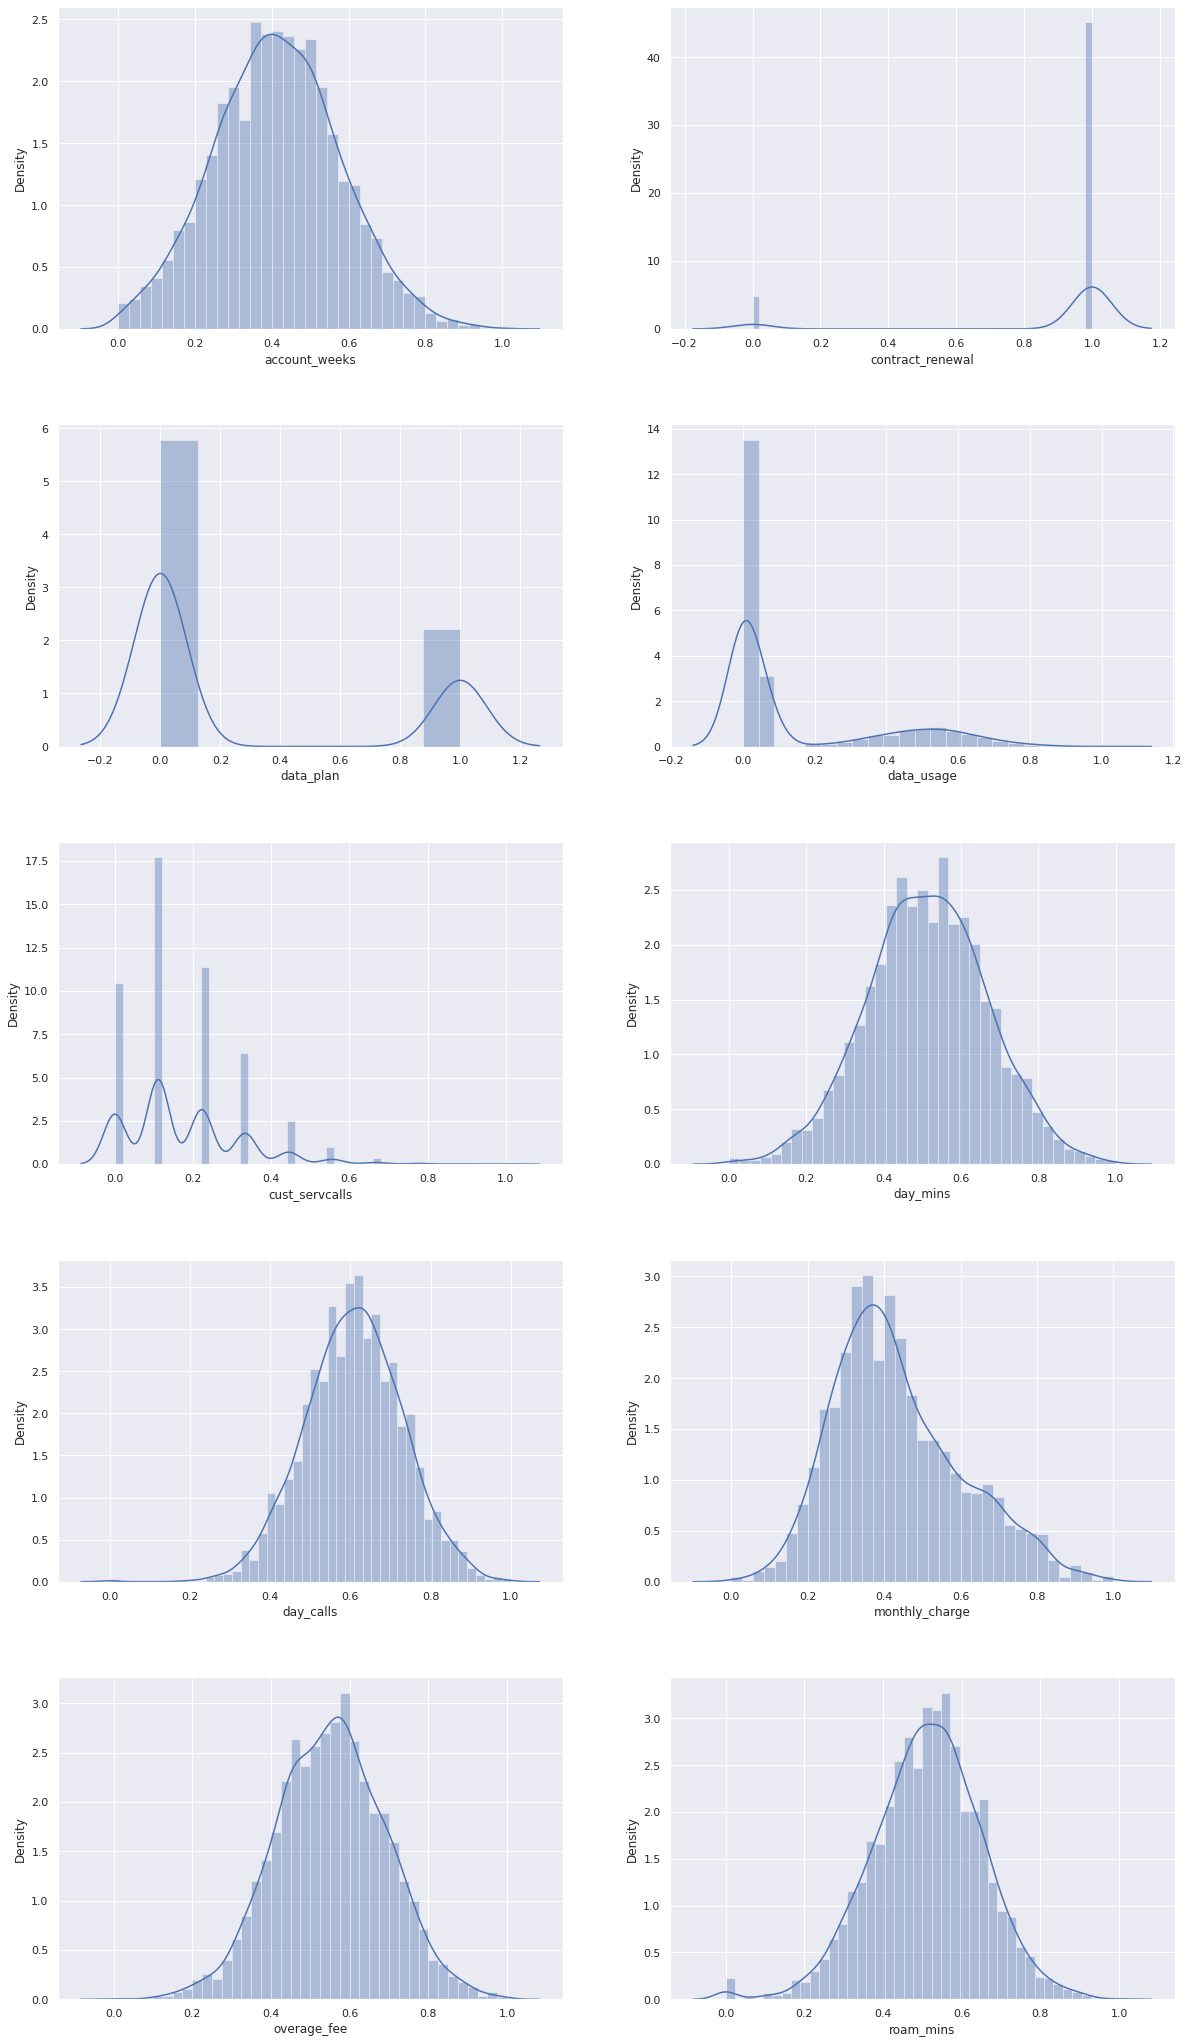

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(18,30))
fig.tight_layout(pad=6.0)
sns.distplot(minmax_churndata['account_weeks'], ax=axes[0][0])
sns.distplot(minmax_churndata['contract_renewal'], ax=axes[0][1])
sns.distplot(minmax_churndata['data_plan'], ax=axes[1][0])
sns.distplot(minmax_churndata['data_usage'], ax=axes[1][1])
sns.distplot(minmax_churndata['cust_servcalls'], ax=axes[2][0])
sns.distplot(minmax_churndata['day_mins'], ax=axes[2][1])
sns.distplot(minmax_churndata['day_calls'], ax=axes[3][0])
sns.distplot(minmax_churndata['monthly_charge'], ax=axes[3][1])
sns.distplot(minmax_churndata['overage_fee'], ax=axes[4][0])
sns.distplot(minmax_churndata['roam_mins'], ax=axes[4][1])


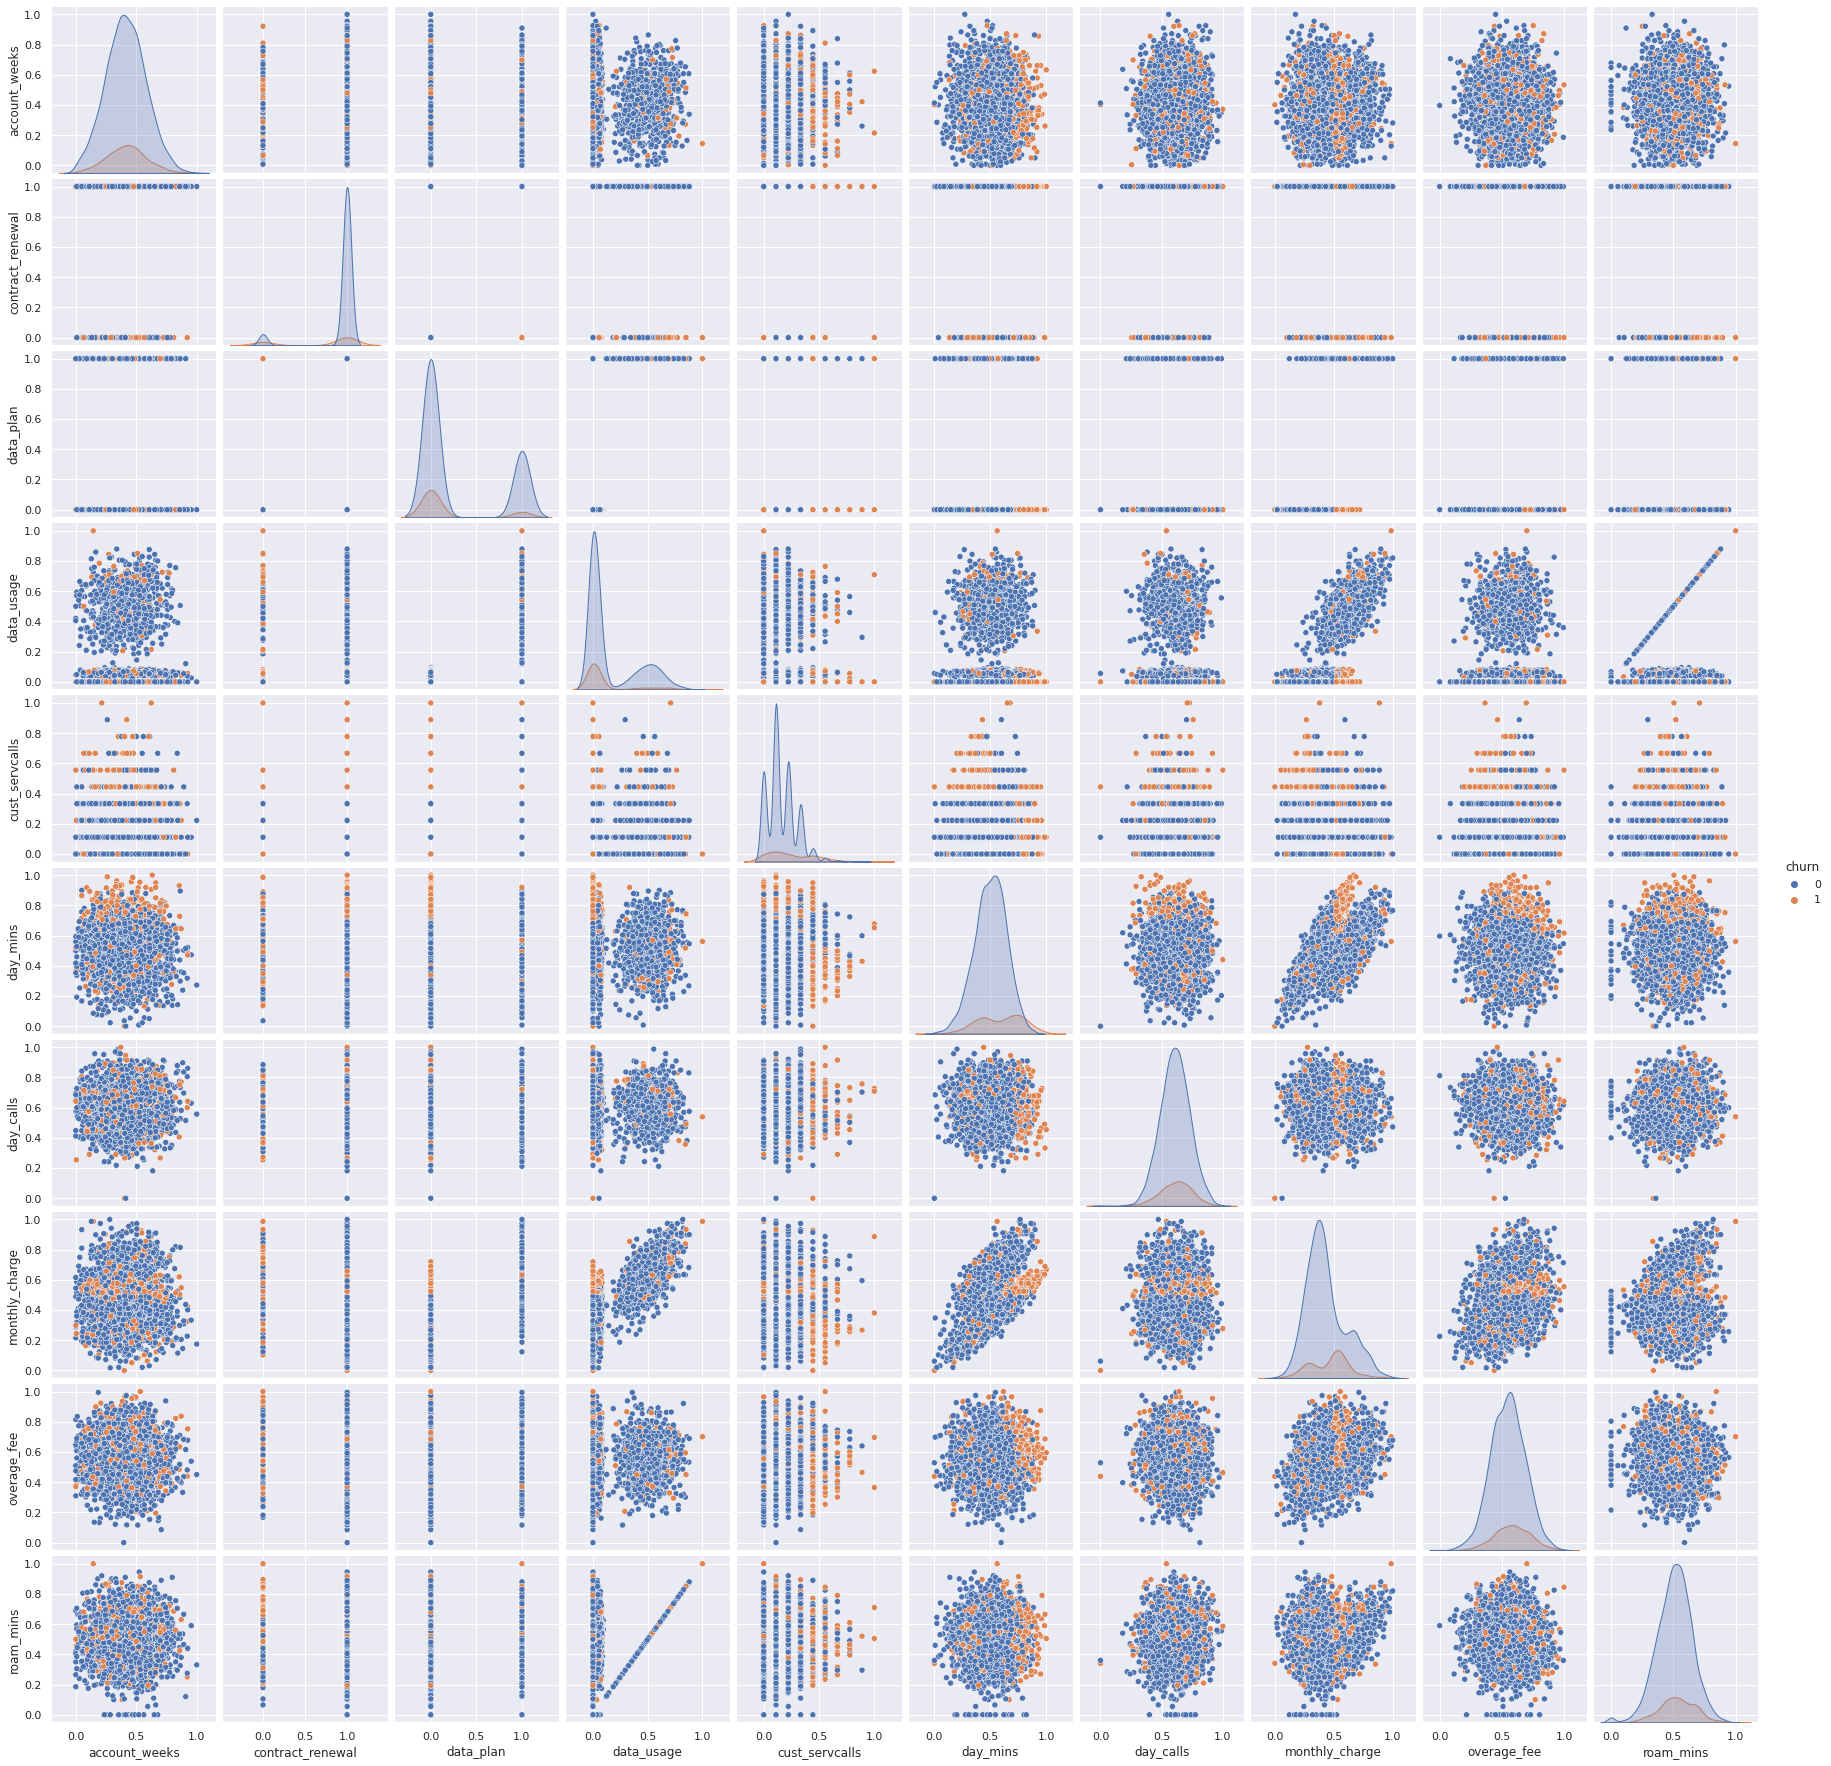

In [ ]:
sns.pairplot(minmax_churndata, hue ='churn');

In [ ]:
#initializing the X (independent variables) and y (dependent variable)
X = minmax_churndata.drop('churn', axis = 1)
y = minmax_churndata['churn']

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuffledsplit = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
for train_index, test_index in strat_shuffledsplit.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2333, 10), (2333,), (1000, 10), (1000,))

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 5, sampling_strategy = 1.0)   # sampling_strategy = 1.0 means eqalizing both the classes 0 and 1

In [ ]:
#fit the sampling
X_train, y_train = sm.fit_sample(X_train, y_train)

In [ ]:
#checking the result of SMOTE application
uniqueval, counts = np.unique(y_train, return_counts=True) 
balance_data = dict(zip(uniqueval, counts))
balance_data

{0: 1995, 1: 1995}

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3990, 10), (3990,), (1000, 10), (1000,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve, roc_auc_score, classification_report

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state= 42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
print("accuracy score: ",  accuracy_score(y_test, y_pred_lr))
print("Test data f1 score: ", f1_score(y_test,y_pred_lr))

accuracy score:  0.776
Test data f1 score:  0.5


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 112
True Negative 664
False Positive 191
False Negative 33


In [ ]:
# Recall = TP / (TP + FN)
# Precision = TP / (TP + FP)
print("recall score: ", recall_score(y_test,y_pred_lr))
print("precision score: ", precision_score(y_test,y_pred_lr))

recall score:  0.7724137931034483
precision score:  0.3696369636963696


In [ ]:
#calculating the specificity
specificity = tn / (tn + fp)
specificity

0.776608187134503

In [ ]:
#calculating the roc_auc score
roc_auc_score(y_test, y_pred_lr)

0.7745109901189756

In [ ]:
#classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       855
           1       0.37      0.77      0.50       145

    accuracy                           0.78      1000
   macro avg       0.66      0.77      0.68      1000
weighted avg       0.87      0.78      0.80      1000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [ ]:
param_dtc = {'max_depth': [2,4,6],
              'criterion': ['gini', 'entropy']}

In [ ]:
gs_dtc = GridSearchCV(
    estimator=dtc,
    param_grid=param_dtc,
    n_jobs = 10,
    cv = 10,
    verbose=True)


In [ ]:
gs_dtc.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.7s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:    6.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [ ]:
#printing which are the best parameter selected
gs_dtc.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
gs_dtc.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [ ]:
# finding our predicted values
y_pred_dtc = gs_dtc.predict(X_test)

In [ ]:
gs_dtc.best_score_

0.8754385964912281

In [ ]:
#model score
gs_dtc.score(X_test, y_test)

0.887

In [ ]:
print("accuracy score: ",  accuracy_score(y_test, y_pred_dtc))
print("Test data f1 score: ", f1_score(y_test,y_pred_dtc))

accuracy score:  0.887
Test data f1 score:  0.672463768115942


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dtc).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 116
True Negative 771
False Positive 84
False Negative 29


In [ ]:
# Recall = TP / (TP + FN)
# Precision = TP / (TP + FP)
print("recall score: ", recall_score(y_test,y_pred_dtc))
print("precision score: ", precision_score(y_test,y_pred_dtc))

recall score:  0.8
precision score:  0.58


In [ ]:
#calculating the specificity
specificity = tn / (tn + fp)
specificity

0.9017543859649123

In [ ]:
#calculating the roc_auc score
roc_auc_score(y_test, y_pred_dtc)

0.8508771929824561

In [ ]:
#classification report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       855
           1       0.58      0.80      0.67       145

    accuracy                           0.89      1000
   macro avg       0.77      0.85      0.80      1000
weighted avg       0.91      0.89      0.89      1000



In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

#fit training data to the basic model
xgbmodel = XGBClassifier(random_state = 42)
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#getting the best features and transforming our X_train and X_test features
selection = SelectFromModel(xgbmodel)
selection.fit(X_train, y_train)

# Transform the train and test features
X_train = selection.transform(X_train)
X_test = selection.transform(X_test)

In [ ]:
#columns are reduced from 10 to 4
X_train.shape

(3990, 4)

In [ ]:
xgbc = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
gs = GridSearchCV(
    estimator=xgbc,
    param_grid=parameters,
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
#training the model on best parameter
gs.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   47.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  4.5min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  5.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
        

In [ ]:
#printing which are the best parameter selected
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [ ]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 180}

In [ ]:
# finding our predicted values
pred = gs.predict(X_test)

In [ ]:
#model score
gs.score(X_test, y_test)

0.86

In [ ]:
gs.best_score_

0.9027568922305764

In [ ]:
print("accuracy score: ",  accuracy_score(y_test, pred))
print("Test data f1 score: ", f1_score(y_test,pred))

accuracy score:  0.86
Test data f1 score:  0.5857988165680474


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 99
True Negative 761
False Positive 94
False Negative 46


In [ ]:
# Recall = TP / (TP + FN)
# Precision = TP / (TP + FP)
print("recall score: ", recall_score(y_test,pred))
print("precision score: ", precision_score(y_test,pred))

recall score:  0.6827586206896552
precision score:  0.5129533678756477


In [ ]:
#calculating the specificity
specificity = tn / (tn + fp)
specificity

0.8900584795321638

In [ ]:
#calculating the roc_auc score
roc_auc_score(y_test, pred)

0.7864085501109095

In [ ]:
#classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       855
           1       0.51      0.68      0.59       145

    accuracy                           0.86      1000
   macro avg       0.73      0.79      0.75      1000
weighted avg       0.88      0.86      0.87      1000



# DecisionTreeClassifier has given the best accuracy.
# So DecisionTreeClassifier model Algorithm is best for this problem set.